## Import CTH-UHB Intrapartum CTG Records

This notebook provides an example of importing a FHR and UC record from the open CTH-UHB Intrapartum database on PhysioNet. 

In [1]:
%matplotlib inline

#Import the waveform database library
import wfdb
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import fhrpreproc as fhrpre

In [ ]:
#Load Physionet databases recognized by the library
dblist = wfdb.getdblist()

In [ ]:
#Print List of databases
print (dblist)

In [ ]:
#Download the desired database to a local directory
wfdb.dldatabase('ctu-uh b-ctgdb', '/Users/humza/Google Drive/nanodegree/machine-learning-master/projects/capstone/fetal_heart_rate/RawData', records = 'all', annotators = 'all',
           keepsubdirs = True, overwrite = False)


In [2]:
#Set path to downloaded data
path = '/Users/humza/Google Drive/nanodegree/machine-learning-master/projects/capstone/fetal_heart_rate/RawData'

In [3]:
#Import List of Record Names without .hea extension

data = pd.read_csv("RECORDS.csv")
recordList = data['RECORDS']


In [ ]:
#Create a record object by reading one subjects data
record = wfdb.rdsamp(path + '/1002', sampfrom=0, sampto=None, channels=None,
                physical=True, pbdir = None, m2s=True)


In [72]:
index = 0
pH = []
delType = []

FHRmeanStage1 = []
FHRvarStage1 = []
nAccStage1 = []
nDecStage1 = []
EnVLFStage1 = []
EnLFStage1 = []
EnHFStage1 = []

FHRmeanStage2 = []
FHRvarStage2 = []
nAccStage2 = []
nDecStage2 = []
EnVLFStage2 = []
EnLFStage2 = []
EnHFStage2 = []

for subject in recordList:
    record = wfdb.rdsamp(path + '/' + str(subject), sampfrom=0, sampto=None, channels=None,
                    physical=True, pbdir = None, m2s=True)
    FHRpreproc = fhrpre.FHRpreproc(record)
    FHRpreproc.parseHeader()
    pH.append(FHRpreproc.pH)
    delType.append(FHRpreproc.delType)
    LaborSigs = FHRpreproc.sepLaborSigs()
    
    trimStage1 = FHRpreproc.trimSignal(LaborSigs[0],150)
    compStage1 = FHRpreproc.compSignal(trimStage1)
    FHRmeanStage1.append(FHRpreproc.calcFHRMean(compStage1))
    FHRvarStage1.append(FHRpreproc.calcFHRVariability(compStage1))
    nAccStage1.append(FHRpreproc.calcAcc(compStage1,FHRmeanStage1[index],15))
    nDecStage1.append(FHRpreproc.calcDec(compStage1,FHRmeanStage1[index],15))
    EnergyStage1 = FHRpreproc.calcEnergy(compStage1,FHRmeanStage1[index],0.03,0.15,0.5)
    EnVLFStage1.append(EnergyStage1[0])
    EnLFStage1.append(EnergyStage1[1])
    EnHFStage1.append(EnergyStage1[2])
    
    compStage2 = FHRpreproc.compSignal(LaborSigs[2])
    if len(compStage2) > 0:
        FHRmeanStage2.append(FHRpreproc.calcFHRMean(compStage2))
        FHRvarStage2.append(FHRpreproc.calcFHRVariability(compStage2))
    else:
        FHRmeanStage2.append(np.nan)
        FHRvarStage2.append(np.nan)
    
    if len(compStage2) > 1200:
        nAccStage2.append(FHRpreproc.calcAcc(compStage2,FHRmeanStage2[index],15))
        nDecStage2.append(FHRpreproc.calcDec(compStage2,FHRmeanStage2[index],15))
        EnergyStage2 = FHRpreproc.calcEnergy(compStage2,FHRmeanStage2[index],0.03,0.15,0.5)
        EnVLFStage2.append(EnergyStage2[0])
        EnLFStage2.append(EnergyStage2[1])
        EnHFStage2.append(EnergyStage2[2])
    else:
        nAccStage2.append(np.nan)
        nDecStage2.append(np.nan)
        EnVLFStage2.append(np.nan)
        EnLFStage2.append(np.nan)
        EnHFStage2.append(np.nan)
    index = index + 1
    
display(np.mean(FHRmeanStage1),np.mean(FHRvarStage1))
display(np.mean(nAccStage1),np.mean(nDecStage1),np.mean(EnVLF),np.mean(EnLF),np.mean(EnHF))

display(np.nanmean(FHRmeanStage2),np.nanmean(FHRvarStage2))
display(np.nanmean(nAccStage2),np.nanmean(nDecStage2),np.nanmean(EnVLFStage2),np.nanmean(EnLFStage2),np.nanmean(EnHFStage2))

136.17838225681228

15.069809395484015

4.7282608695652177

5.4637681159420293

77369252084442256.0

275.75447690912222

916.09760166251795

125.21808040087313

20.822110165617627

3.017994858611825

3.3341902313624678

1.1710814013854285e+36

138.22199671712897

299.57059619116154

In [86]:
Stage1FHRFeat = pd.DataFrame({'records': recordList,'pH': pH,'delType': delType,'FHRmeanStage1': FHRmeanStage1,
                            'FHRvarStage1':FHRvarStage1,'nAccStage1':nAccStage1,
                            'nDecStage1':nDecStage1,'EnVLFStage1':EnVLFStage1,'EnLFStage1':EnLFStage1,
                            'EnHFStage1':EnHFStage1})

display(Stage1FHRFeat.head())

Stage2FHRFeat = pd.DataFrame({'records': recordList,'pH': pH,'delType': delType,'FHRmeanStage2': FHRmeanStage2,
                            'FHRvarStage2':FHRvarStage2,'nAccStage2':nAccStage2,
                            'nDecStage2':nDecStage2,'EnVLFStage2':EnVLFStage2,'EnLFStage2':EnLFStage2,
                            'EnHFStage2':EnHFStage2})

display(Stage2FHRFeat.head())

,EnHFStage1,EnLFStage1,EnVLFStage1,FHRmeanStage1,FHRvarStage1,delType,nAccStage1,nDecStage1,pH,records
0,902.462960,267.169847,941.928447,138.870581,15.773382,1,13,4,7.14,1001
1,958.015864,285.017149,87.850088,154.746364,12.371969,1,8,1,7.00,1002
2,903.501345,265.755464,82.578260,125.799270,10.182458,1,1,4,7.20,1003
3,1106.034546,327.330353,33502.132894,139.473826,14.354380,1,9,9,7.30,1004
4,876.397237,259.720617,494.143181,121.139616,15.292318,1,6,7,7.30,1005


,EnHFStage2,EnLFStage2,EnVLFStage2,FHRmeanStage2,FHRvarStage2,delType,nAccStage2,nDecStage2,pH,records
0,166.546037,76.172356,8.512652e+11,128.563385,27.486803,1,7.0,1.0,7.14,1001
1,187.045911,195.977311,7.838176e+09,112.826003,32.598928,1,7.0,7.0,7.00,1002
2,180.365825,56.508993,4.816502e+14,100.445423,21.797320,1,3.0,6.0,7.20,1003
3,151.003808,81.813934,1.089751e+11,100.608371,24.540074,1,3.0,2.0,7.30,1004
4,176.648777,70.563553,3.940553e+06,108.108704,22.456808,1,2.0,3.0,7.30,1005


In [38]:
FHRpreproc = fhrpre.FHRpreproc(record)
FHRpreproc.parseHeader()
print(FHRpreproc.siglen,FHRpreproc.pH,FHRpreproc.delType,FHRpreproc.posStage2)
SepSig = FHRpreproc.sepLaborSigs()
display (SepSig)
trimSignal = FHRpreproc.trimSignal(SepSig[0],150)
compSignal = FHRpreproc.compSignal(trimSignal)
meanFHR = FHRpreproc.calcFHRMean(compSignal)
FHRvar = FHRpreproc.calcFHRVariability(compSignal)
nAcc = FHRpreproc.calcAcc(compSignal,meanFHR,15)
nDec = FHRpreproc.calcDec(compSignal,meanFHR,15)
Energy = FHRpreproc.calcEnergy(compSignal,meanFHR,0.03,0.15,0.5)
print(meanFHR,FHRvar,nAcc,nDec)
print(Energy)

19137 7.01 2 None


(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 19137,
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 19137)

111.075608676 19.1238485988 7 13
(343.80007246648546, 251.45438942945179, 821.65619475262747)


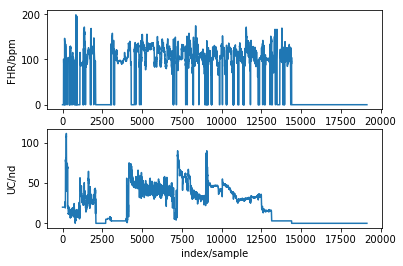

In [24]:
#Use wfdb library to plot records
wfdb.plotrec(record)

In [ ]:
#Print and Gather some useful record characteristics
#View sampling frequency
print (record.fs)
#FHR Signal Length
#First column of p_signals is FHR
siglen = len(record.p_signals[:,0])
print(siglen)
#std = np.std(a[:,0])
#print(std)
#a = np.mean(a[np.nonzero(a[:,0])])
#print(a)

headerInfo=record.comments
#Isolate pH
pHstring = headerInfo[2]
pHmatch=re.search('pH\s*(\d+.\d+)',pHstring)
pHmatch2= re.search('pH\s*(\d+)',pHstring)
if pHmatch:
    pH = float(pHmatch.group(1))
if pHmatch2:
    ph = float(pHmatch2.group(1))
    print(ph)
print("ph found:",ph)

#Pos stage II- This is position in raw signal sample not an index of an array
posStage2String = headerInfo[40]
posStage2 = re.search('Pos. II.st.\s*(\d+)',posStage2String)
if posStage2:
    posStage2 = int(posStage2.group(1))
print("Position of Stage II is:",posStage2)

#Delivery Type
delTypeString = headerInfo[36]
delType = re.search('Deliv. type\s*(\d+)',delTypeString)
if delType:
    delType = int(delType.group(1))
print("Delivery Type is",delType)

In [ ]:
#Separate Stage I Signal
Stage1Sig = record.p_signals[0:posStage2,0]
Stage1len = len(Stage1Sig)
#print("Length of Stage I is: ",Stage1len," datapoints and ", Stage1len)/4, " sec")))
print("Length of Stage I is: %d datapoints and %.2f seconds" % (Stage1len,Stage1len/4))
#Separate Stage II Signal
Stage2Sig = record.p_signals[posStage2:,0]
Stage2len = len(Stage2Sig)
print("Length of Stage 2 is: %d datapoints and %.2f seconds" % (Stage2len,Stage2len/4))

In [ ]:
#Set Time Length to remove samples from beginning or end of sample
#This is time potentially confounding signal if equipment just started/ended acquisition

#Define Excluded Time-Frame in seconds and number of samples
excTimeFrameSecs = 150
excTimeFrameSamp = 150*4
#Compress by removing zero elements from each when a signal was not able to be acquired
Stage1SigTrim = Stage1Sig[excTimeFrameSamp:]
print("Stage I trimmed length is: %d datapoints and %.2f seconds" % (len(Stage1SigTrim),len(Stage1SigTrim)/4))
Stage2SigTrim = Stage2Sig[0:Stage2len-excTimeFrameSamp]
print("Stage II trimmed length is: %d datapoints and %.2f seconds" % (len(Stage2SigTrim),len(Stage2SigTrim)/4))

#Compress each Signal by removing zero elements
Stage1SigComp = Stage1SigTrim[np.nonzero(Stage1SigTrim)]
Stage2SigComp = Stage2SigTrim[np.nonzero(Stage2SigTrim)]
print("Stage I Compressed length is: %d datapoints and %.2f seconds" % (len(Stage1SigComp),len(Stage1SigComp)/4))
print("Stage II Compressed length is: %d datapoints and %.2f seconds" % (len(Stage2SigComp),len(Stage2SigComp)/4))



In [ ]:
Stage1FHRMean = np.mean(Stage1SigComp)
Stage1HRV = np.std(Stage1SigComp)
Stage2FHRMean = np.mean(Stage2SigComp)
Stage2HRV = np.std(Stage2SigComp)

print("Stage I Compressed Signal Mean: %.2f and HRV: %.2f" % (Stage1FHRMean,Stage1HRV))
print("Stage 2 Compressed Signal Mean: %.2f and HRV: %.2f" % (Stage2FHRMean,Stage2HRV))


In [ ]:
#Acceleration Detection Stage I

#Calculation of acceleration minimum detection time in number of samples
minAccDur = 15 #seconds
minAccSamp = minAccDur*record.fs
print(minAccSamp)

count = 0
prevCheck = 0
nAcc = 0
for i in range(len(Stage1SigComp)):
    if Stage1SigComp[i] > (Stage1FHRMean+15):
        count=count+1
    #    print(count)
    else:
        if (count > minAccSamp):
#            print("YES")
            nAcc = nAcc+1
        count = 0       

print(nAcc)



In [ ]:
#Acceleration Detection Stage II

#Calculation of acceleration minimum detection time in number of samples
minAccDur = 15 #seconds
minAccSamp = minAccDur*record.fs
print(minAccSamp)

count = 0
prevCheck = 0
nAcc = 0
for i in range(len(Stage2SigComp)):
    if Stage2SigComp[i] > (Stage2FHRMean+15):
        count=count+1
    #    print(count)
    else:
        if (count > minAccSamp):
#            print("YES")
            nAcc = nAcc+1
        count = 0       

print(nAcc)

In [ ]:
#Decelerations Detection Stage I

#Calculation of acceleration minimum detection time in number of samples
minAccDur = 15 #seconds
minAccSamp = minAccDur*record.fs
print(minAccSamp)

count = 0
prevCheck = 0
nDec = 0
for i in range(len(Stage1SigComp)):
    if Stage1SigComp[i] < (Stage1FHRMean-15):
        count=count+1
    #    print(count)
    else:
        if (count > minAccSamp):
#            print("YES")
            nDec = nDec+1
        count = 0       

print(nDec)

In [ ]:
#Decelerations Detection Stage II

#Calculation of acceleration minimum detection time in number of samples
minAccDur = 15 #seconds
minAccSamp = minAccDur*record.fs
print(minAccSamp)

count = 0
prevCheck = 0
nDec = 0
for i in range(len(Stage2SigComp)):
    if Stage2SigComp[i] < (Stage2FHRMean+15):
        count=count+1
    #    print(count)
    else:
        if (count > minAccSamp):
#            print("YES")
            nDec = nDec+1
        count = 0       

print(nDec)

In [ ]:
Fs = record.fs  # sampling rate
Ts = 1.0/Fs # sampling interval
n = len(Stage1SigComp) # length of the signal
t = np.arange(0,n) # time vector
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
Y = np.fft.fft(Stage1SigComp-Stage1FHRMean)/n # fft computing and normalization
Y = abs(Y[range(int(n/2))])
P = np.power(Y,Y)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,Stage1SigComp)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[1:],P[1:],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|^2')

#plt.plot(frq,Y)

print(frq)

VLFindex = np.argmax(frq>=0.03)
print(VLFindex,frq[VLFindex])
EnVLF = np.sum(P[0:VLFindex])

LFindex = np.argmax(frq>=0.15)
print(LFindex, frq[LFindex])
EnLF = np.sum(P[VLFindex:LFindex])

#HFindex = len(frq)
HFindex = np.argmax(frq>=0.5)
print(HFindex,frq[HFindex])
EnHF = np.sum(P[LFindex:HFindex])

print(frq[HFindex-1])
print(EnVLF,EnLF,EnHF)

In [ ]:
Fs = record.fs  # sampling rate
Ts = 1.0/Fs # sampling interval
n = len(Stage2SigComp) # length of the signal
t = np.arange(0,n) # time vector
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
Y = np.fft.fft(Stage2SigComp-Stage2FHRMean)/n # fft computing and normalization
Y = Y[range(int(n/2))]
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,Stage2SigComp)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(np.power(Y,Y)),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

#plt.plot(frq,Y)

VLFindex = np.argmax(frq>=0.03)
print(VLFindex,frq[VLFindex])
EnVLF = np.sum(P[0:VLFindex])

LFindex = np.argmax(frq>=0.15)
print(LFindex, frq[LFindex])
EnLF = np.sum(P[VLFindex:LFindex])

#HFindex = len(frq)
HFindex = np.argmax(frq>=0.5)
print(HFindex,frq[HFindex])
EnHF = np.sum(P[LFindex:HFindex])

print(frq[HFindex-1])
print(EnVLF,EnLF,EnHF)

In [ ]:
#List Signal Length
print (record.siglen)
#List record comment
print (record.comments)

In [ ]:
#Alternate way of loading a record
#Output signal as a numpy array, and a dictionary of fields describing signal
sig, fields = wfdb.srdsamp(path + '/1003')

In [ ]:
#view length of FHR signal
len(sig)

In [ ]:
#view dictionary
fields

In [ ]:
#view the sampling frequency field
fields['fs']